In [1]:
from time import time
notebook_start_time = time()

In [2]:
import os
import cv2
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold

from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader as DL

In [3]:
TRANSFORM = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize([0.485, 0.456, 0.406], 
                                                     [0.229, 0.224, 0.225])
                               ])
PATH = "../input/petfinder-pawpularity-score"
batch_size = [32, 64, 128]
SEED = 0

In [4]:
def breaker(num=50, char="*"):
    print("\n" + num*char + "\n")


def show(image: np.ndarray) -> None:
    plt.figure(figsize=(9, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

    
def get_image(path: str, name: str, size: int):
    image = cv2.imread(os.path.join(path, name + ".jpg"), cv2.IMREAD_COLOR)
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2RGB)
    image = cv2.resize(src=image, dsize=(size, size), interpolation=cv2.INTER_AREA)
    return image


def get_filenames_and_targets(path: str):
    df = pd.read_csv(os.path.join(path, "train.csv"))
    names   = df["Id"].copy().values
    targets = df["Pawpularity"].copy().values
    return names, targets

In [5]:
class DS_1(Dataset):
    def __init__(self, images=None, targets=None, transform=None):
        self.images = images
        self.targets = targets
        self.transform = transform
    
    def __len__(self):
        return self.images.shape[0]

    def __getitem__(self, idx):
        return self.transform(self.images[idx]), torch.FloatTensor(self.targets[idx])

    
class DS_2(Dataset):
    def __init__(self, base_path=None, filenames=None, targets=None, image_size=None, transform=None):
        self.base_path = base_path
        self.filenames = filenames
        self.targets = targets
        self.image_size = image_size
        self.transform = transform
    
    def __len__(self):
        return self.filenames.shape[0]
    
    def __getitem__(self, idx):
        image = get_image(self.base_path, self.filenames[idx], self.image_size)
        return self.transform(image), torch.FloatTensor(self.targets[idx])

In [6]:
filenames, targets = get_filenames_and_targets(PATH)

start_time = time()
images = np.load("../input/pet-finder-images/Images.npy")
breaker()
print("Time Taken to Load .npy File : {:.2f} minutes".format((time()-start_time)/60))
breaker()

targets = targets.reshape(-1, 1)

data_setup_1 = DS_1(images=images, targets=targets, transform=TRANSFORM)
data_setup_2 = DS_2(base_path=os.path.join(PATH, "train"), 
                    filenames=filenames, targets=targets, 
                    image_size=224, transform=TRANSFORM)


**************************************************

Time Taken to Load .npy File : 0.22 minutes

**************************************************



## Batch Size : 32

In [7]:
dataloader_1 = DL(data_setup_1, batch_size=batch_size[0], shuffle=False)
dataloader_2 = DL(data_setup_2, batch_size=batch_size[0], shuffle=False)

start_time = time()
for X, y in dataloader_1:
    pass
breaker()
print("DataLoader 1 Time : {:.2f} minutes".format((time() - start_time)/60))


start_time = time()
for X, y in dataloader_2:
    pass
breaker()
print("DataLoader 2 Time : {:.2f} minutes".format((time() - start_time)/60))


breaker()


**************************************************

DataLoader 1 Time : 0.10 minutes

**************************************************

DataLoader 2 Time : 3.34 minutes

**************************************************




**************************************************

DataLoader 1

**************************************************



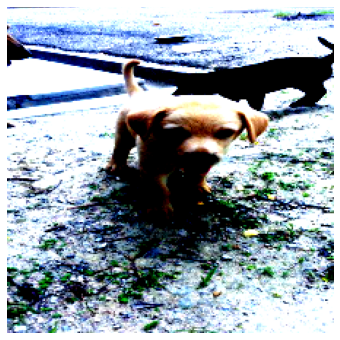


**************************************************

Dataloader 1 Labels : tensor([[63.],
        [42.],
        [28.],
        [15.],
        [72.]])

**************************************************

DataLoader 2

**************************************************



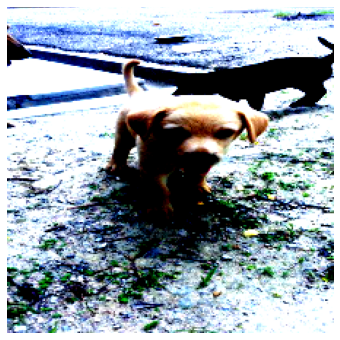


**************************************************

Dataloader 2 Labels : tensor([[63.],
        [42.],
        [28.],
        [15.],
        [72.]])

**************************************************



In [8]:
breaker()
print("DataLoader 1")
breaker()
imgs, tgts = next(iter(dataloader_1))
show(imgs[0].detach().cpu().numpy().transpose(1, 2, 0))

breaker()
print("Dataloader 1 Labels : {}".format(tgts[:5]))


breaker()
print("DataLoader 2")
breaker()
imgs, tgts = next(iter(dataloader_2))
show(imgs[0].detach().cpu().numpy().transpose(1, 2, 0))

breaker()
print("Dataloader 2 Labels : {}".format(tgts[:5]))


breaker()

## Batch Size : 64

In [9]:
dataloader_1 = DL(data_setup_1, batch_size=batch_size[1], shuffle=False)
dataloader_2 = DL(data_setup_2, batch_size=batch_size[1], shuffle=False)

start_time = time()
for X, y in dataloader_1:
    pass
breaker()
print("DataLoader 1 Time : {:.2f} minutes".format((time() - start_time)/60))


start_time = time()
for X, y in dataloader_2:
    pass
breaker()
print("DataLoader 2 Time : {:.2f} minutes".format((time() - start_time)/60))


breaker()


**************************************************

DataLoader 1 Time : 0.11 minutes

**************************************************

DataLoader 2 Time : 2.68 minutes

**************************************************




**************************************************

DataLoader 1

**************************************************



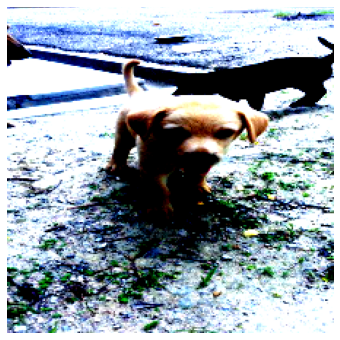


**************************************************

Dataloader 1 Labels : tensor([[63.],
        [42.],
        [28.],
        [15.],
        [72.]])

**************************************************

DataLoader 2

**************************************************



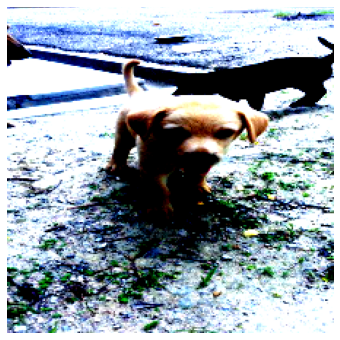


**************************************************

Dataloader 2 Labels : tensor([[63.],
        [42.],
        [28.],
        [15.],
        [72.]])

**************************************************



In [10]:
breaker()
print("DataLoader 1")
breaker()
imgs, tgts = next(iter(dataloader_1))
show(imgs[0].detach().cpu().numpy().transpose(1, 2, 0))

breaker()
print("Dataloader 1 Labels : {}".format(tgts[:5]))


breaker()
print("DataLoader 2")
breaker()
imgs, tgts = next(iter(dataloader_2))
show(imgs[0].detach().cpu().numpy().transpose(1, 2, 0))

breaker()
print("Dataloader 2 Labels : {}".format(tgts[:5]))


breaker()

## Batch Size : 128

In [11]:
dataloader_1 = DL(data_setup_1, batch_size=batch_size[2], shuffle=False)
dataloader_2 = DL(data_setup_2, batch_size=batch_size[2], shuffle=False)

start_time = time()
for X, y in dataloader_1:
    pass
breaker()
print("DataLoader 1 Time : {:.2f} minutes".format((time() - start_time)/60))


start_time = time()
for X, y in dataloader_2:
    pass
breaker()
print("DataLoader 2 Time : {:.2f} minutes".format((time() - start_time)/60))


breaker()


**************************************************

DataLoader 1 Time : 0.11 minutes

**************************************************

DataLoader 2 Time : 2.67 minutes

**************************************************




**************************************************

DataLoader 1

**************************************************



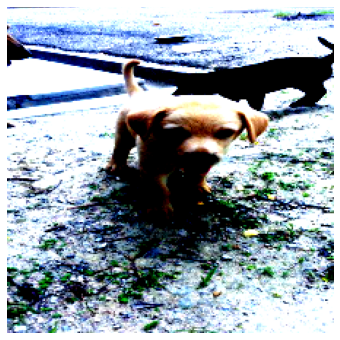


**************************************************

Dataloader 1 Labels : tensor([[63.],
        [42.],
        [28.],
        [15.],
        [72.]])

**************************************************

DataLoader 2

**************************************************



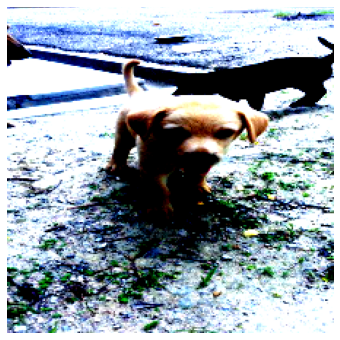


**************************************************

Dataloader 2 Labels : tensor([[63.],
        [42.],
        [28.],
        [15.],
        [72.]])

**************************************************



In [12]:
breaker()
print("DataLoader 1")
breaker()
imgs, tgts = next(iter(dataloader_1))
show(imgs[0].detach().cpu().numpy().transpose(1, 2, 0))

breaker()
print("Dataloader 1 Labels : {}".format(tgts[:5]))


breaker()
print("DataLoader 2")
breaker()
imgs, tgts = next(iter(dataloader_2))
show(imgs[0].detach().cpu().numpy().transpose(1, 2, 0))

breaker()
print("Dataloader 2 Labels : {}".format(tgts[:5]))


breaker()

## Splits

**DS_1**

In [13]:
for tr_idx, va_idx in KFold(n_splits=5, shuffle=True, random_state=0).split(images):
    break

tr_images, va_images   = images[tr_idx], images[va_idx]
tr_targets, va_targets = targets[tr_idx], targets[va_idx]

tr_data_setup = DS_1(tr_images, tr_targets, TRANSFORM)
va_data_setup = DS_1(va_images, va_targets, TRANSFORM)

dataloaders = {
    "train" : DL(tr_data_setup, batch_size=batch_size[1], shuffle=True, generator=torch.manual_seed(SEED)),
    "valid" : DL(va_data_setup, batch_size=batch_size[1], shuffle=False)
}

start_time = time()
for X, y in dataloaders["train"]:
    pass
breaker()
print("DataLoader 1 (Train) Time : {:.2f} minutes".format((time() - start_time)/60))

start_time = time()
for X, y in dataloaders["valid"]:
    pass
breaker()
print("DataLoader 1 (Valid) Time : {:.2f} minutes".format((time() - start_time)/60))


breaker()


**************************************************

DataLoader 1 (Train) Time : 0.07 minutes

**************************************************

DataLoader 1 (Valid) Time : 0.02 minutes

**************************************************




**************************************************

Train

**************************************************



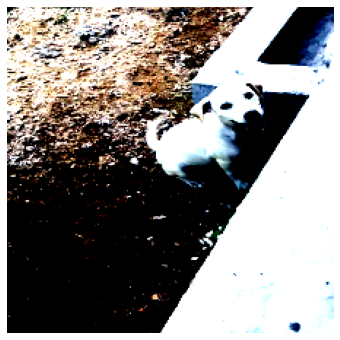


**************************************************

Train Dataloader Labels : tensor([[28.],
        [30.],
        [34.],
        [33.],
        [39.]])

**************************************************

Valid

**************************************************



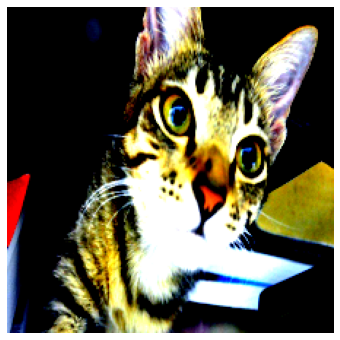


**************************************************

Valid Dataloader Labels : tensor([[21.],
        [98.],
        [53.],
        [50.],
        [31.]])

**************************************************



In [14]:
breaker()
print("Train")
breaker()
imgs, tgts = next(iter(dataloaders["train"]))
show(imgs[0].detach().cpu().numpy().transpose(1, 2, 0))

breaker()
print("Train Dataloader Labels : {}".format(tgts[:5]))


breaker()
print("Valid")
breaker()
imgs, tgts = next(iter(dataloaders["valid"]))
show(imgs[0].detach().cpu().numpy().transpose(1, 2, 0))

breaker()
print("Valid Dataloader Labels : {}".format(tgts[:5]))


breaker()

**DS_2**

In [15]:
for tr_idx, va_idx in KFold(n_splits=5, shuffle=True, random_state=SEED).split(filenames):
    break

tr_filenames, va_filenames = filenames[tr_idx], filenames[va_idx]
tr_targets, va_targets     = targets[tr_idx], targets[va_idx]

tr_data_setup = DS_2(base_path=os.path.join(PATH, "train"), 
                     filenames=tr_filenames, targets=tr_targets, 
                     image_size=224, transform=TRANSFORM)
va_data_setup = DS_2(base_path=os.path.join(PATH, "train"), 
                     filenames=va_filenames, targets=va_targets, 
                     image_size=224, transform=TRANSFORM)

dataloaders = {
    "train" : DL(tr_data_setup, batch_size=batch_size[1], shuffle=True, generator=torch.manual_seed(SEED)),
    "valid" : DL(va_data_setup, batch_size=batch_size[1], shuffle=False)
}

start_time = time()
for X, y in dataloaders["train"]:
    pass
breaker()
print("DataLoader 2 (Train) Time : {:.2f} minutes".format((time() - start_time)/60))

start_time = time()
for X, y in dataloaders["valid"]:
    pass
breaker()
print("DataLoader 2 (Valid) Time : {:.2f} minutes".format((time() - start_time)/60))


breaker()


**************************************************

DataLoader 2 (Train) Time : 2.13 minutes

**************************************************

DataLoader 2 (Valid) Time : 0.54 minutes

**************************************************




**************************************************

Train

**************************************************



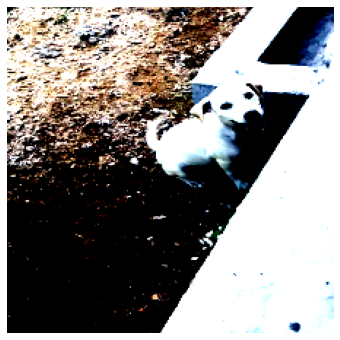


**************************************************

Train Dataloader Labels : tensor([[28.],
        [30.],
        [34.],
        [33.],
        [39.]])

**************************************************

Valid

**************************************************



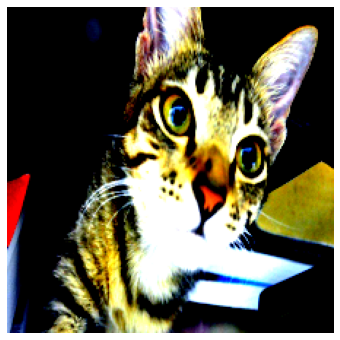


**************************************************

Valid Dataloader Labels : tensor([[21.],
        [98.],
        [53.],
        [50.],
        [31.]])

**************************************************



In [16]:
breaker()
print("Train")
breaker()
imgs, tgts = next(iter(dataloaders["train"]))
show(imgs[0].detach().cpu().numpy().transpose(1, 2, 0))

breaker()
print("Train Dataloader Labels : {}".format(tgts[:5]))


breaker()
print("Valid")
breaker()
imgs, tgts = next(iter(dataloaders["valid"]))
show(imgs[0].detach().cpu().numpy().transpose(1, 2, 0))

breaker()
print("Valid Dataloader Labels : {}".format(tgts[:5]))


breaker()

In [17]:
breaker()
print("Notebook Run Time : {:.2f} minutes".format((time()-notebook_start_time)/60))
breaker()


**************************************************

Notebook Run Time : 12.20 minutes

**************************************************

